# A real-estate marketing problem
A home value expert wants to create a prediction model for house prices in a specific town using the data in the table. They want to see if the house price can be predicted by the total living area. Let's build this prediction model.
datafile: marketing.csvDownload marketing.csv
Create a jupyter notebook (hand-in as pdf), with following:
 
1. Read file 'marketing.csv' and show first five lines
2. Create scatterplots showing the correlation between selling price and the other attributes.
3. Fit the regression model to the data.
4. Get the coefficient of determination (R^2)
5. Use the model to make a prediction
What about the quality of the regression model?

## 1. Read file and show first five lines.

In [10]:
import pandas as pd

# Reading the CSV file
data = pd.read_csv('marketing.csv')

# Displaying the first five rows of the dataset
data.head()


,Sq. Feet (in 000s),Garage,Bedrooms,Price (in $000s)
0,1000,none,2,65
1,1100,none,2,73
2,1150,one-car,2,85
3,1400,none,3,87
4,1700,one-car,3,98


## 2. Create scatterplots showing the correlation between selling price and the other attributes.

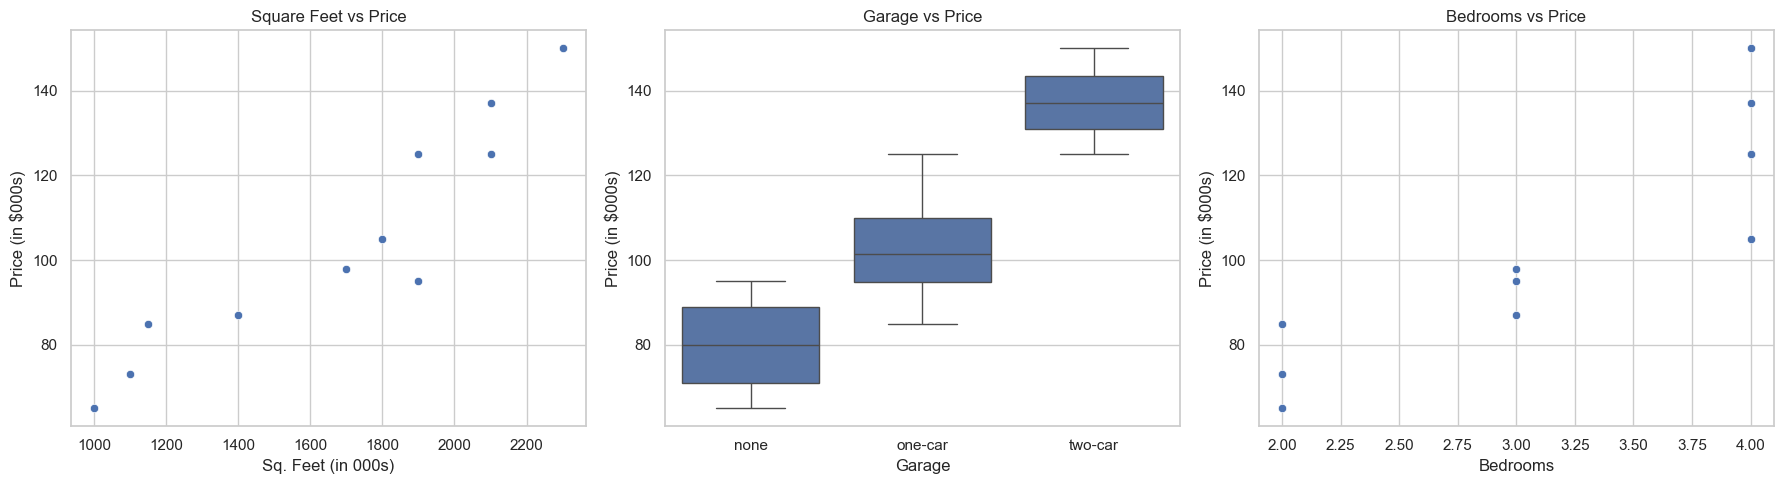

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style of the visualization
sns.set(style="whitegrid")

# Creating a figure to hold the subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Scatter plot for Sq. Feet vs Price
sns.scatterplot(data=data, x='Sq. Feet (in 000s)', y='Price (in $000s)', ax=axs[0])
axs[0].set_title('Square Feet vs Price')

# Since Garage is categorical, let's use a boxplot to show its relationship with Price
sns.boxplot(data=data, x='Garage', y='Price (in $000s)', ax=axs[1])
axs[1].set_title('Garage vs Price')

# Scatter plot for Bedrooms vs Price
sns.scatterplot(data=data, x='Bedrooms', y='Price (in $000s)', ax=axs[2])
axs[2].set_title('Bedrooms vs Price')

plt.tight_layout()
plt.show()


## 3. Fit the regression model to the data.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Selecting the predictor (X) and the response variable (y)
X = data[['Sq. Feet (in 000s)']]  # Predictor: Square Feet
y = data['Price (in $000s)']      # Response: Price

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the regression model to the training data
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

## 4. Get the coefficient of determination (R^2)

In [13]:
from sklearn.metrics import r2_score

# Predicting the test set results
y_pred = reg_model.predict(X_test)

# Calculating the coefficient of determination (R^2) for the model
r_squared = r2_score(y_test, y_pred)

r_squared


0.9442619843108755

## 5. Use the model to make a prediction

In [14]:
# Making a prediction using the model
# Predicting the price for a house with 1,500 square feet (or 1.5 in the dataset's scale)
predict_sq_feet = 1.5
predicted_price = reg_model.predict([[predict_sq_feet]])

predicted_price[0]

D:\PycharmProjects\A real-estate marketing problem\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


13.90742315692173

In [15]:
# Creating a DataFrame for prediction to include the feature name
predict_df = pd.DataFrame({'Sq. Feet (in 000s)': [predict_sq_feet]})

# Making the prediction using the DataFrame
predicted_price = reg_model.predict(predict_df)

predicted_price[0]


13.90742315692173